# Prostate Imaging Test - Segmentation

## Imports

In [2]:
import nibabel as nb
import dicom2nifti
import shutil
import os
import matplotlib.pyplot as plt

## Data Exploration & Pre-processing

### Convert DICOM to NIFTI

In [ ]:
output_dir = 'Dataset001_Prostate/imagesTr'
dicom_dir = 'Dataset001_Prostate/imagesTr'

dicom2nifti.convert_directory(dicom_dir, output_dir)

### Rename and gzip files

In [3]:
def main():
    folder_path = 'Dataset002_Prostate/imagesTr'
    for count, filename in enumerate(sorted(os.listdir(folder_path))):
        dst = f"PCA_" + str(count).zfill(3) + ".nii"
        
        src = f"{folder_path}/{filename}"
        dst = f"{folder_path}/{dst}"
        
        os.rename(src, dst)

if __name__ == '__main__':
    main()

In [ ]:
import gzip

def gzip_dir(directory):
    for filename in os.listdir(directory):
        file_path = os.path.join(directory, filename)
        
        if os.path.isfile(file_path) and not filename.endswith('.gz'):
            gzipped_file_path=f"{file_path}.gz"
        
        with open(file_path, 'rb') as f_in:
            with gzip.open(gzipped_file_path, 'wb') as f_out:
                shutil.copyfileobj(f_in, f_out)

In [ ]:
directory = 'Dataset001_Prostate/imagesTr'
gzip_dir(directory)

### Explore training images

In [4]:
tr1 = nb.load('Dataset002_Prostate/lesions/images/T2/ProstateX-0000_t2_tse_tra_4.nii.gz')
print(tr1)


<class 'nibabel.nifti1.Nifti1Image'>
data shape (384, 384, 19)
affine:
[[-4.99999613e-01  1.00167548e-10 -3.77059053e-03  5.76854362e+01]
 [ 1.99305243e-04  4.74188238e-01 -9.51439738e-01 -9.92510300e+01]
 [-5.95989870e-04  1.58573419e-01  2.84512711e+00 -8.78143768e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : np.bytes_(b'')
db_name         : np.bytes_(b'')
extents         : 0
session_error   : 0
regular         : np.bytes_(b'r')
dim_info        : 54
dim             : [  3 384 384  19   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [-1.    0.5   0.5   3.    5.66  0.    0.    0.  ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
ca

In [5]:
tr1_fdata = tr1.get_fdata()
print(tr1_fdata.dtype, tr1_fdata.shape)

float64 (384, 384, 19)


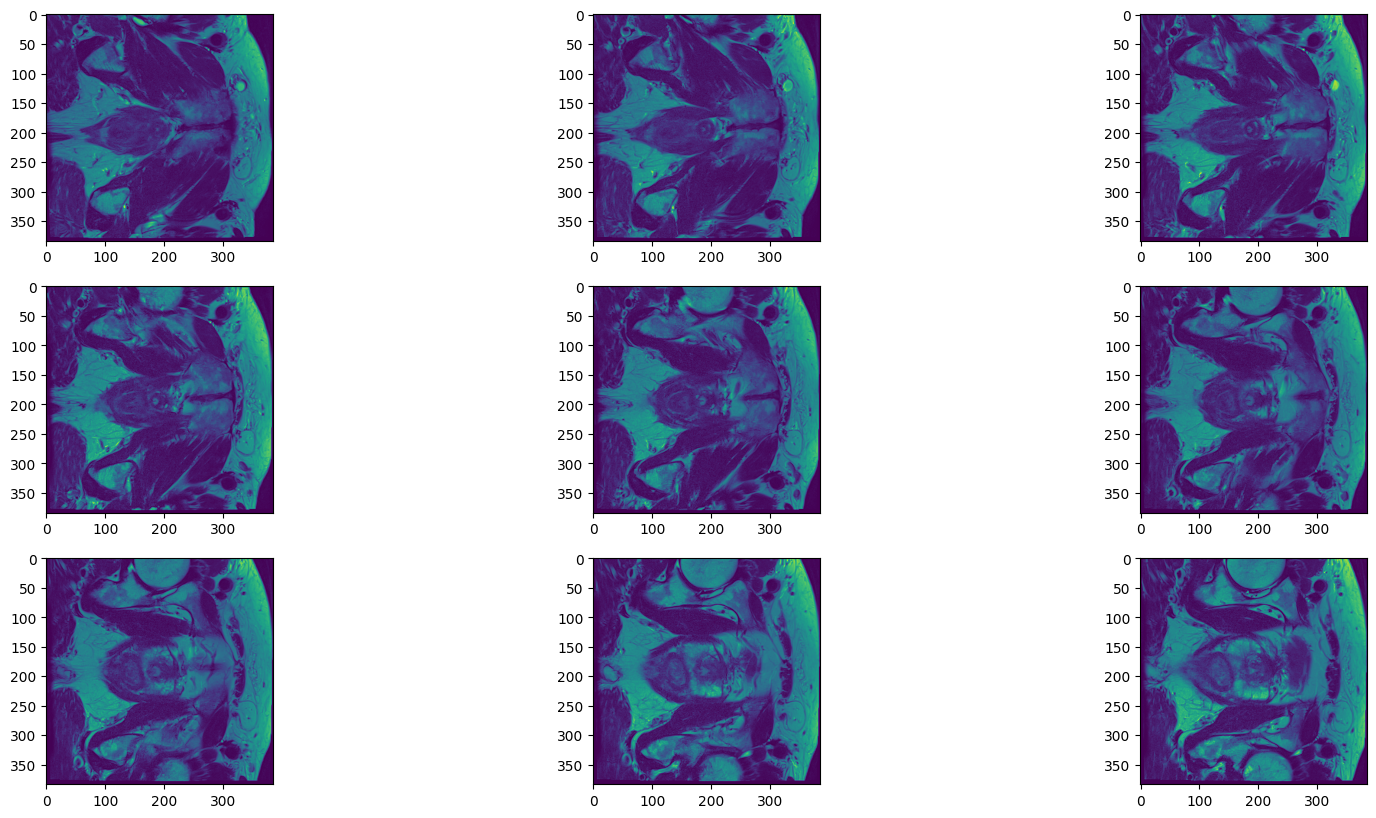

In [6]:
fig, axis = plt.subplots(3, 3, figsize=(20, 10))

slice_counter = 0
for i in range(3):
    for j in range(3):
        axis[i][j].imshow(tr1_fdata[:,:,slice_counter])
        slice_counter+=1

### Explore annotations

In [7]:
mask1 = nb.load('Dataset002_Prostate/lesions/Masks/T2/ProstateX-0000-Finding1-t2_tse_tra_ROI.nii.gz')
print(mask1)


<class 'nibabel.nifti1.Nifti1Image'>
data shape (384, 384, 19)
affine:
[[-4.99999567e-01 -4.75556197e-06 -3.94588803e-03  5.76854362e+01]
 [ 2.04060917e-04  4.74188225e-01 -9.51439683e-01 -9.92510300e+01]
 [-6.25206092e-04  1.58573412e-01  2.84512688e+00 -8.78143768e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : np.bytes_(b'')
db_name         : np.bytes_(b'')
extents         : 0
session_error   : 0
regular         : np.bytes_(b'r')
dim_info        : 0
dim             : [  3 384 384  19   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : uint16
bitpix          : 16
slice_start     : 0
pixdim          : [-1.   0.5  0.5  3.   0.   0.   0.   0. ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal_max    

In [8]:
mask1_fdata = mask1.get_fdata()
print(mask1_fdata.dtype, mask1_fdata.shape)

float64 (384, 384, 19)


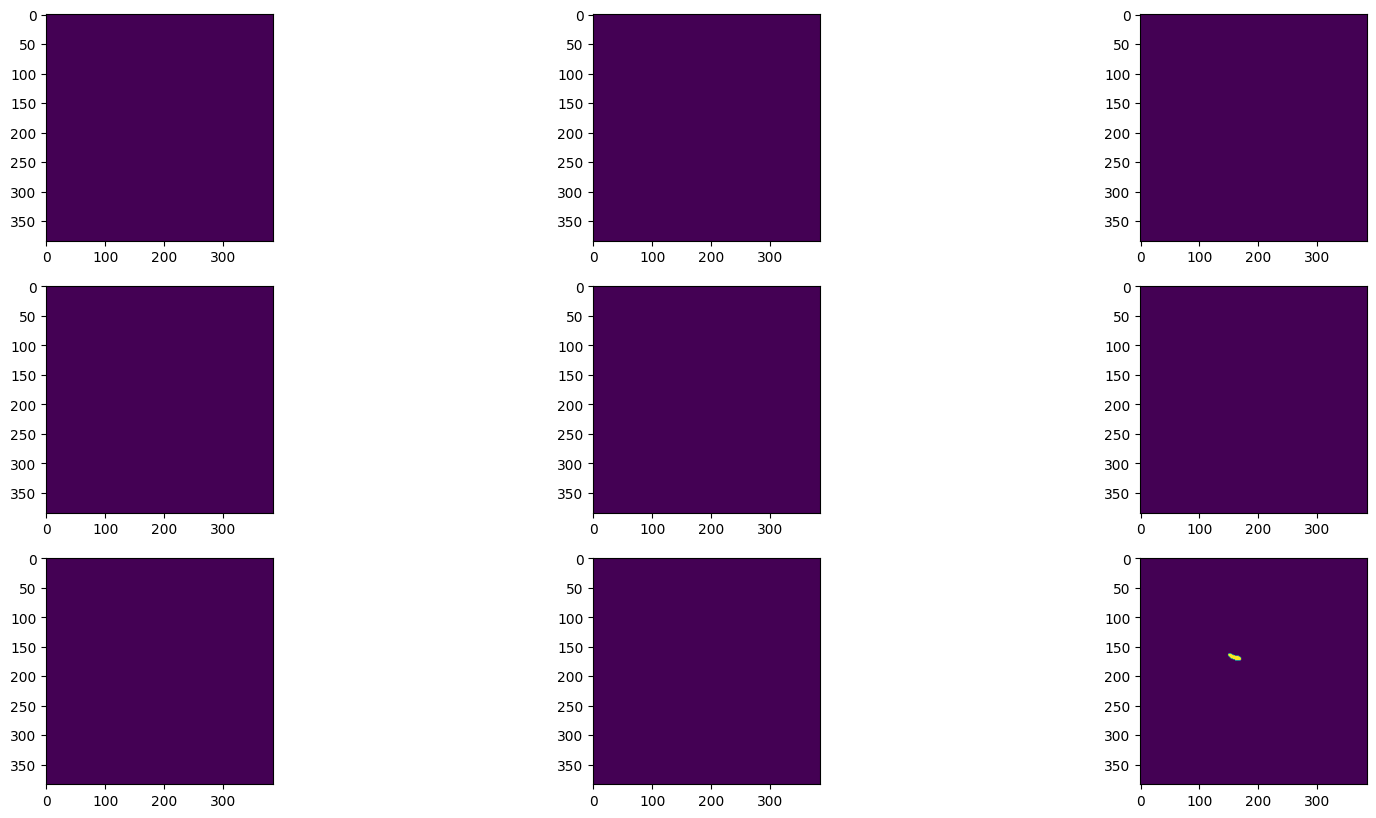

In [9]:
fig, axis = plt.subplots(3, 3, figsize=(20, 10))

slice_counter = 0
for i in range(3):
    for j in range(3):
        axis[i][j].imshow(mask1_fdata[:,:,slice_counter])
        slice_counter+=1